In [1]:
# import libraries to get text from file and to making text language detection and visualization
import speech_recognition as sr
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
import math
import spacy
from spacy_langdetect import LanguageDetector
from spacy.language import Language
import pandas as pd

c:\Users\hrelh\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
# class to split the audio file
class SplitWavAudioMubin():
    def __init__(self, folder, filename):
        self.folder = folder
        self.filename = filename
        self.filepath = folder + '\\' + filename
        
        self.audio = AudioSegment.from_wav(self.filepath)
    
    def get_duration(self):
        return self.audio.duration_seconds
    
    def single_split(self, from_second, to_second, split_filename):
        t1 = from_second * 1000
        t2 = to_second * 1000
        split_audio = self.audio[t1:t2]
        split_audio.export(self.folder + '\\' + split_filename, format="wav")
        
    def multiple_split(self, second_per_split):
        total_seconds = math.ceil(self.get_duration())
        for i in range(0, total_seconds, second_per_split):
            split_fn = str(i) + '_' + self.filename
            self.single_split(i, i+second_per_split, split_fn)
            print(str(i) + ' Done')
            if i == total_seconds - second_per_split:
                print('All splited successfully')

In [5]:
# function to detect language .. we need it in spacy library to detect language
def get_lang_detector(nlp, name):
    return LanguageDetector()

In [6]:
# function to get the audio duration from input audio file
def get_audio_duration(folder_name, file_name):
    data, sampling_rate = librosa.load(folder_name + '\\' + file_name)
    S = librosa.stft(data)
    duration = librosa.get_duration(S = S, sr = sampling_rate)
    return np.ceil(duration)

In [7]:
# function to show audio signal and some information about the input audio file like sampling rate, duration and so on...
def get_audio_information(folder_name, file_name):
    data, sampling_rate = librosa.load(folder_name + '\\' + file_name)
    print("*************************************Audio Information**************************************")
    print("Sampling Rate is : {}".format(sampling_rate))
    print("Audio Duration is : {} Seconds".format(get_audio_duration(folder_name, file_name)))
    print("*******************************************************************************************\n")
    print("*************************************Audio Wave**********************************************")
    plt.figure(figsize=(10,5))
    librosa.display.waveshow(data, sr = sampling_rate)
    plt.title("Audio Wave")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************\n")
    print("*************************************Audio Wave Information***********************************")
    plt.figure(figsize=(10,5))
    melspec = librosa.feature.melspectrogram(y= data, sr= sampling_rate)
    librosa.display.specshow(melspec, y_axis='mel', x_axis='time')
    plt.colorbar()
    plt.title("Audio Wave Information")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************")
    print("*************************************Audio Wave MFCC***********************************")
    plt.figure(figsize=(10,5))
    mfcc = librosa.feature.mfcc(y= data, sr= sampling_rate)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title("Audio Wave MFCC")
    plt.tight_layout()
    plt.show()
    print("********************************************************************************************")

In [8]:
# function to check the length of the input file is larger than the selected time we want to split and also split the audio file if the length 
# of audio file is greater than selected spliting time 
def get_seconds(folder_name, file_name, number_of_seconds):
    flag = False
    audio_duration = get_audio_duration(folder_name, file_name)
    if (audio_duration > number_of_seconds) :
        split_wav = SplitWavAudioMubin(folder_name, file_name)
        split_wav.multiple_split(second_per_split= number_of_seconds)
        print("******************************************************************")
        print("The audio file seperated successfully .. 👌")
        print("******************************************************************\n")
        flag = True
    else:
        print("******************************************************************")
        print("The duration of the file is less than number of seconds ..!")
        print("******************************************************************\n")
    return flag

In [9]:
# first function (not effective function) to visualize and get the text from mixed audio
def get_text_from_audio(folder_name, file_name, number_of_seconds):
    total_text = []
    audio_duration = get_audio_duration(folder_name, file_name)
    get_audio_information(folder_name, file_name)
    seperated = get_seconds(folder_name, file_name, number_of_seconds)
    r = sr.Recognizer()
    if not seperated:
        with sr.AudioFile(folder_name + '\\' + file_name) as source:
            audio = r.listen(source)
            try:
                en_text = r.recognize_google(audio, language = 'en')
                ar_text = r.recognize_google(audio, language = 'ar')
                if (len(en_text) > len(ar_text)):
                    total_text.append(en_text)
                else:
                    total_text.append(ar_text)
            except:
                print('Can not recognize the audio file ..!')
    else:
        num_of_seperated_files = int(np.ceil(audio_duration / number_of_seconds))
        for i in range(0, num_of_seperated_files * number_of_seconds, number_of_seconds):
            new_file_name = folder_name + '\\' + str(i) + '_' + file_name
            with sr.AudioFile(new_file_name) as source:
                audio = r.listen(source)
                try:
                    en_text = r.recognize_google(audio, language = 'en')
                    ar_text = r.recognize_google(audio, language = 'ar')
                    if (len(en_text) > len(ar_text)):
                        total_text.append(en_text)
                    else:
                        total_text.append(ar_text)
                except:
                    print("Error")
                    continue
    return total_text

*************************************Audio Information**************************************
Sampling Rate is : 22050
Audio Duration is : 68.0 Seconds
*******************************************************************************************

*************************************Audio Wave**********************************************


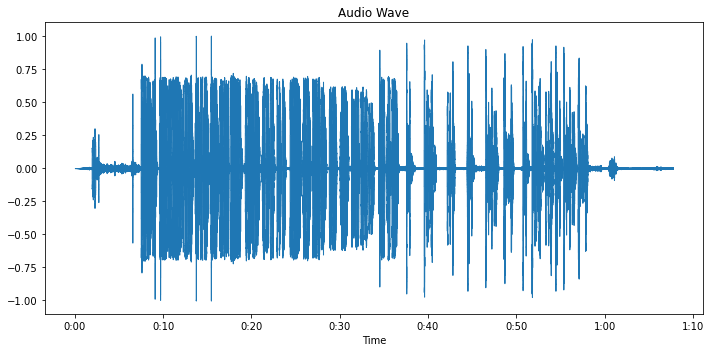

********************************************************************************************

*************************************Audio Wave Information***********************************


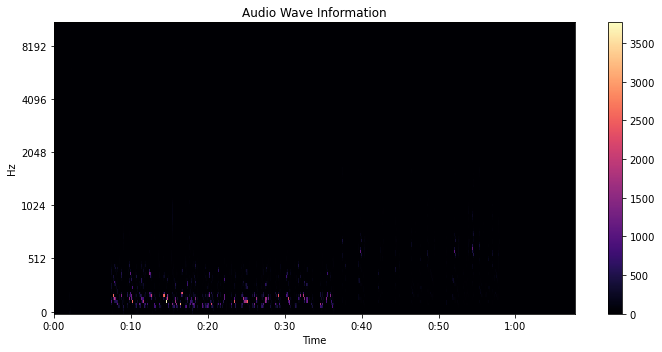

********************************************************************************************
*************************************Audio Wave MFCC***********************************


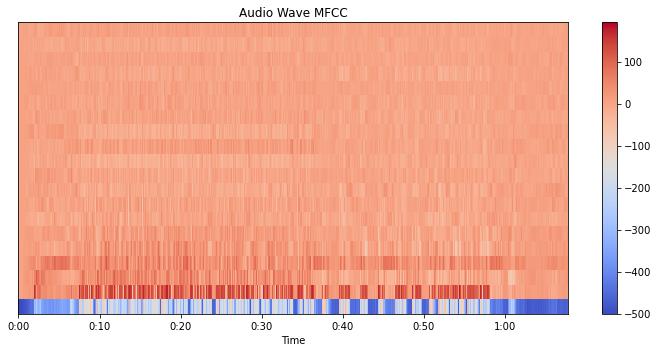

********************************************************************************************
0 Done
5 Done
10 Done
15 Done
20 Done
25 Done
30 Done
35 Done
40 Done
45 Done
50 Done
55 Done
60 Done
65 Done
******************************************************************
The audio file seperated successfully .. 👌
******************************************************************

Error
Error
Error


In [10]:
# Example 1
total_text = get_text_from_audio("الشهادة",'Embracing islam معنى الشهادتين ونطقهما باللغة الإنجليزية.wav',5)

In [11]:
print(total_text)

['if you want to embrace Islam', 'to see in another voice in the following testimony and their standards', "I'm believing it to say I bear witness that", 'lady worthy of worship except Allah and', 'The Witness that Muhammad is the messenger of Allah and Jesus', 'son of Mary is the servants and messenger of Allah', 'fruit in Arabic ashhadu', 'لا اله الا الله وان', 'enamel Hamad in our Solar', 'Ash Hadu Allah ilaha illallah', 'ان محمد رسول الله']


In [12]:
# Second function (effective function) to visualize and get the text from mixed audio
def get_text_from_audio2(folder_name, file_name, number_of_seconds):
    total_text = []
    file_names, status, text = [], [], []
    audio_duration = get_audio_duration(folder_name, file_name)
    get_audio_information(folder_name, file_name)
    seperated = get_seconds(folder_name, file_name, number_of_seconds)
    r = sr.Recognizer()
    nlp = spacy.load('en_core_web_sm')
    Language.factory("language_detector", func=get_lang_detector)
    nlp.add_pipe('language_detector', last=True)
    
    if not seperated:
        with sr.AudioFile(folder_name + '\\' + file_name) as source:
            audio = r.listen(source)
            try:
                en_text = r.recognize_google(audio, language = 'en')
                ar_text = r.recognize_google(audio, language = 'ar')
                en_doc = nlp(en_doc)
                detect_language = en_doc._.language
                if (detect_language['language'] == 'en'):
                    total_text.append(en_text)
                    file_names.append(new_file_name)
                    status.append("Done")
                    text.append(en_text)
                else:
                    total_text.append(ar_text)
                    file_names.append(new_file_name)
                    status.append("Done")
                    text.append(ar_text)
            except:
                print('Can not recognize the audio file ..!')
                file_names.append(new_file_name)
                status.append("Error")
                text.append(None)
    else:
        num_of_seperated_files = int(np.ceil(audio_duration / number_of_seconds))
        for i in range(0, num_of_seperated_files * number_of_seconds, number_of_seconds):
            new_file_name = folder_name + '\\' + str(i) + '_' + file_name
            with sr.AudioFile(new_file_name) as source:
                audio = r.listen(source)
                try:
                    en_text = r.recognize_google(audio, language = 'en')
                    ar_text = r.recognize_google(audio, language = 'ar')
                    en_doc = nlp(en_text)
                    detect_language = en_doc._.language
                    if (detect_language['language'] == 'en'):
                        total_text.append(en_text)
                        file_names.append(new_file_name)
                        status.append("Done")
                        text.append(en_text)
                    else:
                        total_text.append(ar_text)
                        file_names.append(new_file_name)
                        status.append("Done")
                        text.append(ar_text)
                except:
                    print("Can not recognize the audio file: " + new_file_name)
                    file_names.append(new_file_name)
                    status.append("Error")
                    text.append(None)
                    continue

    report_df = pd.DataFrame(file_names, columns=["File Name"])
    report_df['Status'] = status
    report_df["Text"] = text
    
    return total_text, report_df

*************************************Audio Information**************************************
Sampling Rate is : 22050
Audio Duration is : 68.0 Seconds
*******************************************************************************************

*************************************Audio Wave**********************************************


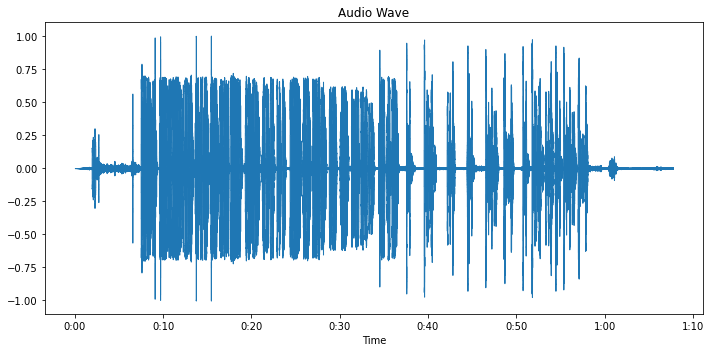

********************************************************************************************

*************************************Audio Wave Information***********************************


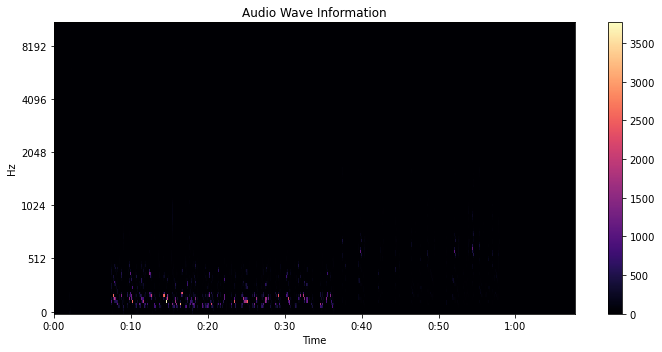

********************************************************************************************
*************************************Audio Wave MFCC***********************************


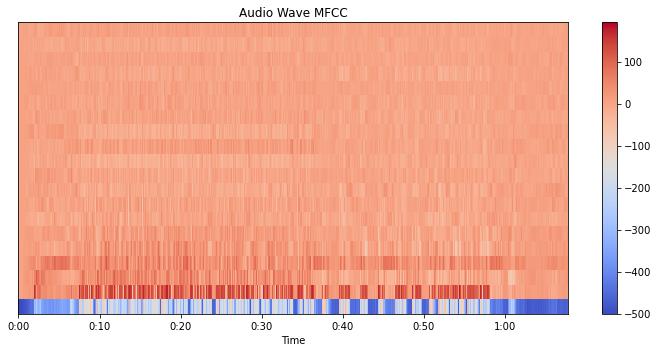

********************************************************************************************
0 Done
5 Done
10 Done
15 Done
20 Done
25 Done
30 Done
35 Done
40 Done
45 Done
50 Done
55 Done
60 Done
65 Done
******************************************************************
The audio file seperated successfully .. 👌
******************************************************************

Can not recognize the audio file: الشهادة\0_Embracing islam معنى الشهادتين ونطقهما باللغة الإنجليزية.wav
Can not recognize the audio file: الشهادة\60_Embracing islam معنى الشهادتين ونطقهما باللغة الإنجليزية.wav
Can not recognize the audio file: الشهادة\65_Embracing islam معنى الشهادتين ونطقهما باللغة الإنجليزية.wav


In [13]:
# Example 1
total_text2, report = get_text_from_audio2("الشهادة",'Embracing islam معنى الشهادتين ونطقهما باللغة الإنجليزية.wav',5)

In [14]:
report

,File Name,Status,Text
0,الشهادة\0_Embracing islam معنى الشهادتين ونطقه...,Error,None
1,الشهادة\5_Embracing islam معنى الشهادتين ونطقه...,Done,if you want to embrace Islam
2,الشهادة\10_Embracing islam معنى الشهادتين ونطق...,Done,to see in another voice in the following testi...
3,الشهادة\15_Embracing islam معنى الشهادتين ونطق...,Done,I'm believing it to say I bear witness that
4,الشهادة\20_Embracing islam معنى الشهادتين ونطق...,Done,lady worthy of worship except Allah and
5,الشهادة\25_Embracing islam معنى الشهادتين ونطق...,Done,The Witness that Muhammad is the messenger of ...
6,الشهادة\30_Embracing islam معنى الشهادتين ونطق...,Done,son of Mary is the servants and messenger of A...
7,الشهادة\35_Embracing islam معنى الشهادتين ونطق...,Done,fruit in Arabic ashhadu
8,الشهادة\40_Embracing islam معنى الشهادتين ونطق...,Done,لا اله الا الله وان
9,الشهادة\45_Embracing islam معنى الشهادتين ونطق...,Done,ان محمد رسول الله


In [15]:
# show the output text from the second function in example 1
print(total_text2)

['if you want to embrace Islam', 'to see in another voice in the following testimony and their standards', "I'm believing it to say I bear witness that", 'lady worthy of worship except Allah and', 'The Witness that Muhammad is the messenger of Allah and Jesus', 'son of Mary is the servants and messenger of Allah', 'fruit in Arabic ashhadu', 'لا اله الا الله وان', 'ان محمد رسول الله', 'اشهد الا اله الا الله واشهد', 'ان محمد رسول الله']


In [16]:
# show the length of successfully text generated from the audio
len(total_text2)

11